# Heart Disease Classification using
 - NAVIE BAYES ALGO
 - K-NEAREST NEIGHBOUR ALGO
 - DECISION TREE ALGO
 
 
 Finding the best classification that gives good accuracy on the dataset of heart disease.

 
 This is a assesment task given by 
 
 Prof Name: **DR. NEELMADHAB PADHY**
 
 
 
 
 
 
 
Degination: **Senior Professor at GIET UNIVERSITY**





 
Topic: **Data Mining And Data Warehousing**


In [1]:
#importing all the lib of python required for visualization and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing the dataset into the dataframe using pandas
dataset=pd.read_csv(r'C:\Users\91824\Downloads\heart.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#This shape function gives us the number of cols and no of rows in the format of (rows,cols)
dataset.shape

(303, 14)

In [5]:
#check the details of each and every feature column and its type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#chech if any null values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
#list of columns in the dataset
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Data contains;
 age - age in years
 
 
 
 
 
 
 sex - (1 = male; 0 = female)
 
 
 
 
 
 cp - chest pain type(1:Typical angina, 2:Atypical angina,3:Non-anginal pain)
 
 
 
 
 
trestbps - resting blood pressure (in mm Hg on admission to the hospital)






chol - serum cholestoral in mg/dl




 fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 
 
 
 
 
 restecg - resting electrocardiographic results
 
 
 
 
thalach - maximum heart rate achieved




 exang - exercise induced angina (1 = yes; 0 = no)
 
 
 
oldpeak - ST depression induced by exercise relative to rest




slope - the slope of the peak exercise ST segment






caa - number of major vessels (0-3) colored by flourosopy




thal - 3 = normal; 6 = fixed defect; 7 = reversable defect


 
 
output - have disease or not (1=yes, 0=no)


In [8]:
#this is the statstical view or representation of the dataset
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
dataset.rename(columns={'exng': 'exang'},inplace =True)
dataset.rename(columns={'output':'target'},inplace =True)
dataset.rename(columns={'thall':'thal'},inplace =True)
dataset.rename(columns={'caa':'ca'},inplace =True)

In [12]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slp,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
dataset.rename(columns={'slp':'slope'},inplace =True)

In [14]:
#the value distribution in target named column
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [15]:
dataset['target'].unique()

array([1, 0], dtype=int64)

In [16]:
#checking correlation of the target attribute with all feature attributes
print(dataset.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# **EDA - EXPLORATARY DATA ANALYSIS**

PERCENTAGE OF PATIENTS HAVE AND DONT HAVE HEART DISEASE

In [17]:
countNoDisease = len(dataset[dataset.target == 0])
countHaveDisease = len(dataset[dataset.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(dataset.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(dataset.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [18]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dataset.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dataset.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\si

<AxesSubplot:xlabel='cp'>

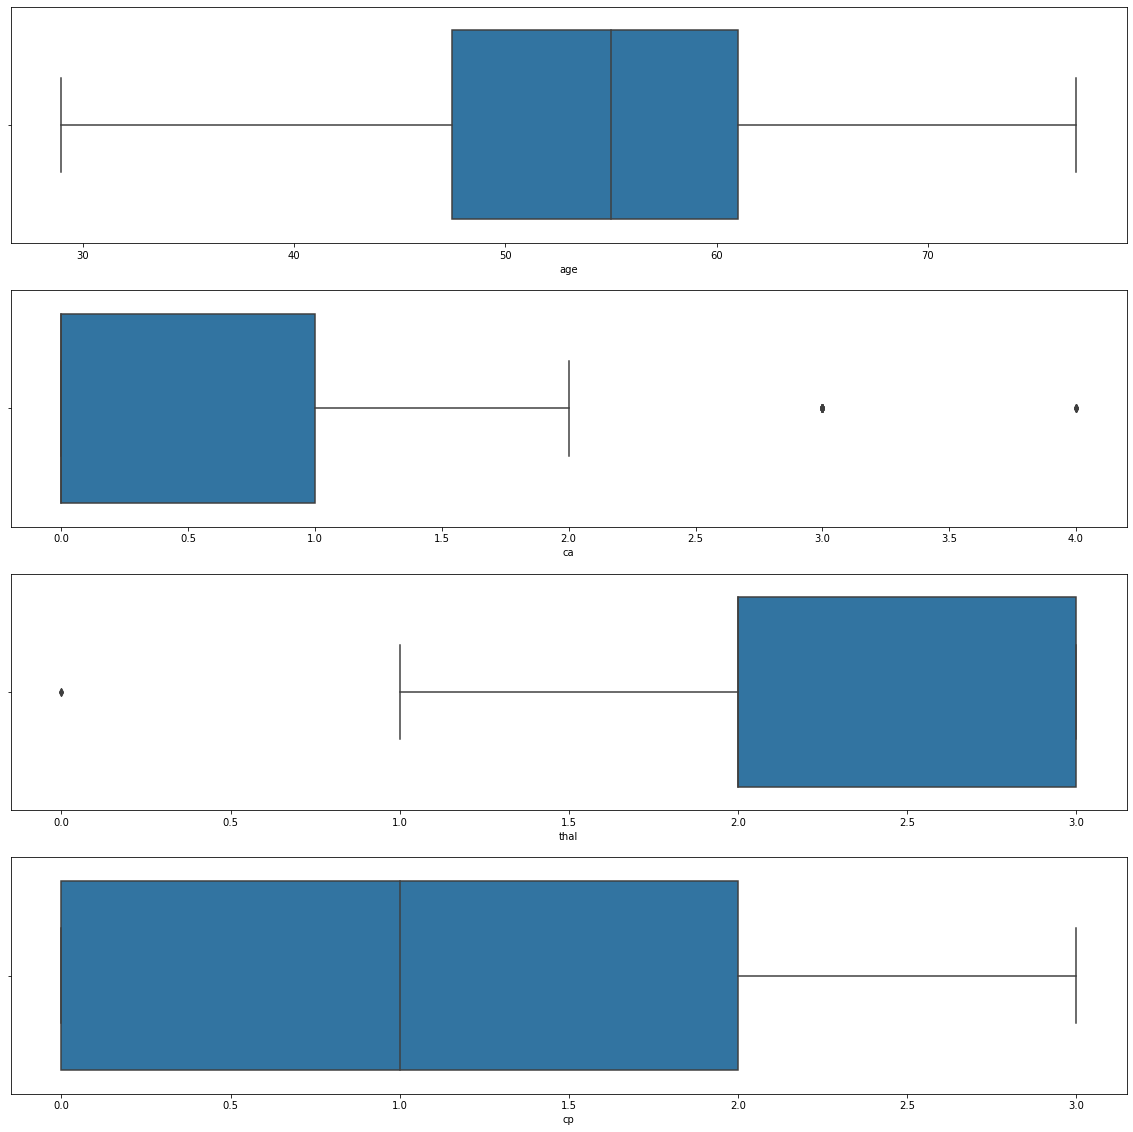

In [19]:
#Box plot representation of the feature attributre

f, axes = plt.subplots(4,1,figsize = (20,20))

sns.boxplot(dataset['age'], ax=axes[0])
sns.boxplot(dataset['ca'],ax=axes[1])
sns.boxplot(dataset['thal'], ax=axes[2])
sns.boxplot(dataset['cp'],ax=axes[3])

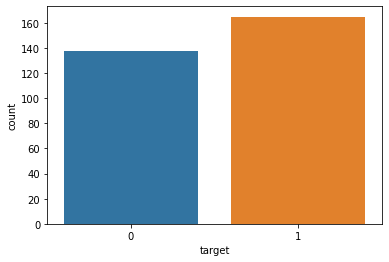

In [20]:
sns.countplot(x=dataset["target"],data=dataset)
plt.show()

**Barplot Representation of Targeted Attribute vs Feature Attribute**

<AxesSubplot:xlabel='sex', ylabel='target'>

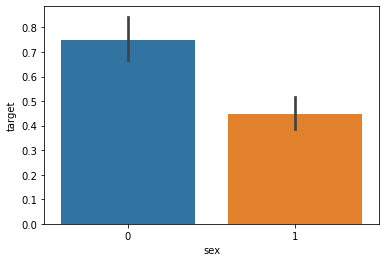

In [21]:
sns.barplot(x=dataset["sex"],y=dataset["target"])

<AxesSubplot:xlabel='cp', ylabel='target'>

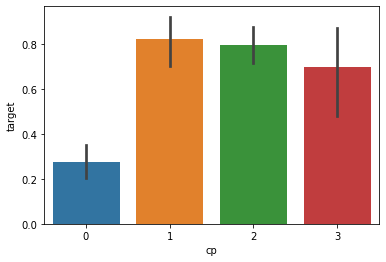

In [22]:
sns.barplot(x=dataset["cp"],y=dataset["target"])

<AxesSubplot:xlabel='restecg', ylabel='target'>

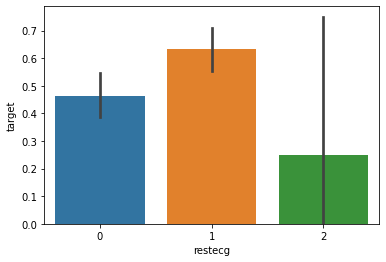

In [23]:
sns.barplot(x=dataset["restecg"],y=dataset["target"])

<AxesSubplot:xlabel='exang', ylabel='target'>

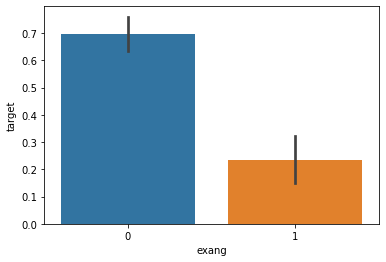

In [24]:
sns.barplot(x=dataset["exang"],y=dataset["target"])

<AxesSubplot:xlabel='fbs', ylabel='target'>

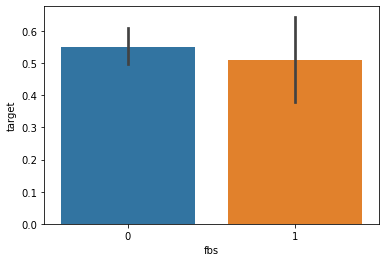

In [25]:
sns.barplot(x=dataset["fbs"],y=dataset["target"])

<AxesSubplot:xlabel='slope', ylabel='target'>

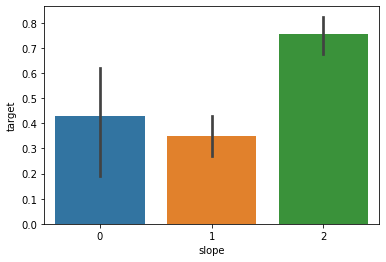

In [26]:
sns.barplot(x=dataset["slope"],y=dataset["target"])

<AxesSubplot:xlabel='ca', ylabel='target'>

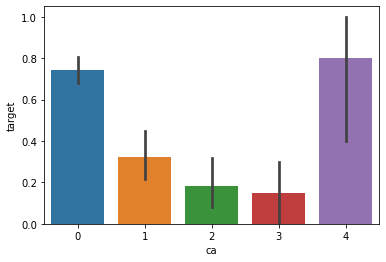

In [27]:
sns.barplot(x=dataset["ca"],y=dataset["target"])

<AxesSubplot:xlabel='thal', ylabel='target'>

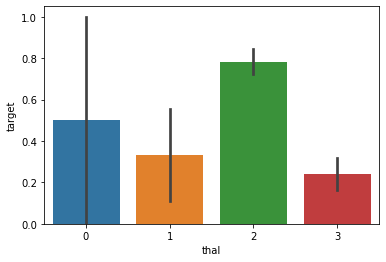

In [29]:
sns.barplot(x=dataset["thal"],y=dataset["target"])

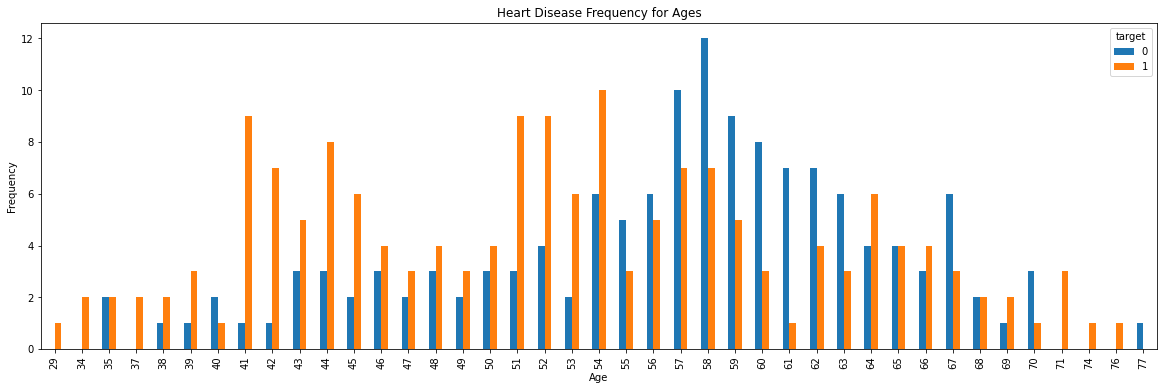

In [30]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Apply Binning Technique**

In [31]:
def binning(col, cut_points, lables=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not lables:
        lables = range(len(cut_points)+1)
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [32]:
cut_points= [30,60]
labels=["Young","Adult","Old"]
dataset["Age_category"]=binning(dataset['age'],cut_points,labels)
dataset

[29, 30, 60, 77]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target,Age_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Adult
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Old
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Adult


In [33]:
dataset= dataset.drop("Age_category",axis=1)

**Split the data into TRAINING AND TESTING**


In [34]:
from sklearn.model_selection import train_test_split   #import the fuction to split the data
features = dataset.drop("target",axis=1)  #all the attributes except the targeted attribute
target= dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.20,random_state=0)

In [35]:
# Now lets visualize the training dataset and testing dataset
print("FEATURES TRAINING DATASET SHAPE:",X_train.shape)
print("FEATURES TESTING DATASET SHAPE: ",X_test.shape)
print("TARGETED TRAINING DATASET SHAPE: ",Y_train.shape)
print("TARGETED TESTING DATASET SHAPE: ",Y_test.shape)

FEATURES TRAINING DATASET SHAPE: (242, 13)
FEATURES TESTING DATASET SHAPE:  (61, 13)
TARGETED TRAINING DATASET SHAPE:  (242,)
TARGETED TESTING DATASET SHAPE:  (61,)


 **AS OF NOW THE DATASET IS DIVIDED INTO TRAINING AND TESTING**

 
 **SO NOW LETS PERFORM THE ALGORITHMS**

In [36]:
#import the algorithms from the sikict learn lib 
from sklearn.naive_bayes import GaussianNB      
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
nb = GaussianNB()
knn =KNeighborsClassifier(n_neighbors = 7) # we chose 7 as because its a safe number

**KNN - K- NEAREST NEIGHBOR :**

In [37]:
knn.fit(X_train,Y_train)  #this fit function is used to fit the dataset into the model and train it
knn_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(knn_pred,Y_test)*100,2)
print("THE ACCURACY OF KNN: "+str(accuracy_knn)+" %")

THE ACCURACY OF KNN: 67.21 %


**NAIVE BAYES :**

In [39]:
nb.fit(X_train,Y_train)
nb_pred = nb.predict(X_test)
accuracy_nb = round(accuracy_score(nb_pred,Y_test)*100,2)
print("THE ACCURACY OF NB: "+str(accuracy_nb)+" %")

THE ACCURACY OF NB: 85.25 %


**DECISION TREE :**

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(dt_pred,Y_test)*100,2)
print("THE ACCURACY OF dt: "+str(accuracy_dt)+" %")

THE ACCURACY OF dt: 75.41 %


In [41]:
from sklearn.metrics import classification_report
print(classification_report(dt_pred,Y_test))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



<AxesSubplot:>

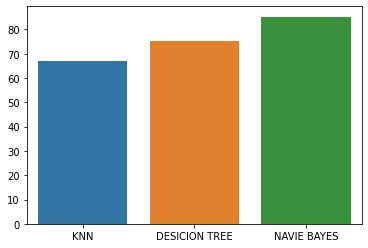

In [43]:
algo=['KNN','DESICION TREE','NAVIE BAYES']
score=[accuracy_knn,accuracy_dt,accuracy_nb]
sns.barplot(x=algo,y=score)

 **FROM THE ABOVE EXPERIMENT WE CAN STATE THAT NAVIE BAYES PERFORMS BETTER WITH HEART DATASET**